In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/Representation\ Discrimination

 ethnic_dataset_cleaned.joblib
 Representation_Discrimination_10187.ipynb
'Representation_Discrimination - Word Embedding Based Approach.ipynb'


In [3]:
import joblib
cleaned_10k_articles = joblib.load("/content/drive/MyDrive/Representation Discrimination/ethnic_dataset_cleaned.joblib")
cleaned_10k_articles[:10]

['আন্তর্জাতিক আদিবাসী দিবস উপলক্ষে বুধবার বিভিন্ন স্থানে সভা-সমাবেশ ও রযালি অনুষ্ঠিত হয়েছে। উপজাতিদের বিভিন্ন সংগঠন এসব কর্মসূচির আয়োজন করে। যুগান্তর ব্যুরো ও প্রতিনিধিদের পাঠানো খবর-সিলেট ব্যুরো : রযালিতে সিলেট প্রেস ক্লাবের সভাপতি ইকরামুল কবির, ইমজার সভাপতি আল আজাদসহ সিলেটের সাংস্কৃতিক অঙ্গনের ব্যক্তি ও উপজাতি জনগোষ্ঠীর লোকজন ছাড়াও বিভিন্ন শ্রেণী-পেশার মানুষ অংশগ্রহণ করেন। এছাড়া দিবসটি উপলক্ষে শাহজালাল বিজ্ঞান ও প্রযুক্তি বিশ্ববিদ্যালয়ে আলোচনা সভা অনুষ্ঠিত হয়েছে। ‘অ্যাসোসিয়েশন অব ইন্ডিজেনাস স্টুডেন্টস, সাস্ট’ ও সমাজকর্ম বিভাগ আলাদা আলাদাভাবে দিবসটি উপলক্ষে রযালি, সেমিনার ও আলোচনা সভার আয়োজন করে।ময়মনসিংহ ব্যুরো : অনুষ্ঠানের উদ্বোধন করেন জেলা পরিষদের চেয়ারম্যান অধ্যাপক ইউসুফ খান পাঠান। বক্তব্য রাখেন হিন্দু বৌদ্ধ খ্রিস্টান ঐক্য পরিষদের সভাপতি বিকাশ রায়, সিপিবি সভাপতি এমদাদুল হক মিল্লাত, মহিলা পরিষদের সভানেত্রী ফেরদৌস আরা মাহমুদা হেলেন, হিল্লুুল নকরেক, অরণ্য-ই চিরান, স্বর্ণকান্ত হাজং সাংবাদিক শরীফুজ্জামান টিটু প্রমুখ।শেরপুর : বাগাছাস সভাপতি রুনু নকরেটের সভাপতিত্বে অনুষ্ঠিত আলোচনা সভায় প্

# Bangla Topic Modeling

In [4]:
sabrinacarpenter_staple

--2024-06-11 15:19:05--  https://github.com/aljubaer/Topic-Modeling-in-Bengali/blob/master/code/stop_words.txt
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘stop_words.txt’

stop_words.txt          [ <=>                ] 424.26K  --.-KB/s    in 0.03s   

2024-06-11 15:19:05 (14.2 MB/s) - ‘stop_words.txt’ saved [434441]



In [5]:
!pip3 install sbnltk

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusol

In [6]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk
import json
import os

nltk.download('punkt')

def valid_bengali_letters(char):
    return ord(char) >= 2433 and ord(char) <= 2543

def get_replacement(char):
    if valid_bengali_letters(char):
        return char
    newlines = [10, 2404, 2405, 2551, 9576]
    if ord(char) in newlines:
        return ' '
    return ' ';

def get_valid_lines(line):
    copy_line = ''
    for letter in line:
        copy_line += get_replacement(letter)
    return copy_line

def sent_to_words(sentences):
    for sentence in sentences:
        yield(nltk.word_tokenize(get_valid_lines(sentence)))  # deacc=True removes punctuations

from sbnltk.Stemmer import stemmerOP
bn_stemmer=stemmerOP()
def stemming_data(content):
    for i, word in enumerate(content):
        content[i] = bn_stemmer.stemWord(word)
    return content
def stemming_data_list(data_list):
    for i, sdata in enumerate(data_list):
        data_list[i] = stemming_data(sdata)
    return data_list

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Downloading...
From: https://drive.google.com/uc?id=142XvJg9xdpgzuYD31Y4pm-ZVdMaWmtuq
To: /usr/local/lib/python3.10/dist-packages/sbnltk/dataset/download_link.txt
100%|██████████| 1.66k/1.66k [00:00<00:00, 5.49MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UIR2arP_6Fm0MqJVbcG2Q9iLCnjQriDB
To: /usr/local/lib/python3.10/dist-packages/sbnltk/dataset/bangla_word_list.txt
100%|██████████| 15.4M/15.4M [00:00<00:00, 140MB/s]
Downloading...
From: https://drive.google.com/uc?id=1e4x5FQrdGyEfBBzQ_DOJ9wBxZZ1F7bx7
To: /usr/local/lib/python3.10/dist-packages/sbnltk/dataset/stopword_list.txt
100%|██████████| 4.77k/4.77k [00:00<00:00, 2.81MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ohRYMGAeq4RZTa3W-7DXEsaUCaVNIxgO
To: /usr/local/lib/python3.10/dist-packages/sbnltk/dataset/rootword_list.txt
100%|██████████| 2.00M/2.00M [00:00<00:00, 56.1MB/s]
Downloading...
From: https:/

In [7]:
stopwords_file = open('stop_words.txt', "r+", encoding = 'utf-8')
all_stopwords = stopwords_file.read()
stopwords_ready = [word.strip() for word in all_stopwords.split()]
def convertToDataFrame(data_json):
    df = pd.DataFrame(data_json)
    print('DataFrame shape' + str(df.shape))
    return df

def remove_stopwords(content):
    without_stopwords = []
    for word in content:
        if word not in stopwords_ready and len(word) > 5:
            without_stopwords.append(word)
    return without_stopwords
def remove_stopwords_list(data_list):
    data_without_stopwords_list = []
    for content in data_list:
        data_without_stopwords_list.append(remove_stopwords(content))
    return data_without_stopwords_list

In [8]:
data_tokenized_list = list(sent_to_words(cleaned_10k_articles))
data_without_stopwords_list = remove_stopwords_list(data_tokenized_list)
data_stemmed_list = stemming_data_list(data_without_stopwords_list)

# Topic Modeling

In [9]:
from gensim.models import CoherenceModel

def runLda(data_ready, num_topics = 10, iterations = 1000, alpha='auto'):
    # Create Dictionary
    id2word = corpora.Dictionary(data_ready)

    # Create Corpus: Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in data_ready]

    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics,
                                               random_state=100,
                                               update_every=1,
                                               chunksize=10000,
                                               passes=30,
                                               alpha=alpha,
                                               iterations=iterations,
                                               per_word_topics=True)

    return lda_model
def ldaOutputProducer(lda_model):
    x = (lda_model.show_topics(num_topics=20, num_words=40,formatted=False))
    topics_words = [(tp[0], [wd[0] for wd in tp[1]], [wd[1] for wd in tp[1]]) for tp in x]
    output_json_list = []

    for topic,words,conts in topics_words:
        topic_json = {}
        topic_content = {}
        topic_content["words"] = words
        topic_content["conts"] = conts
        #topic_json[str(topic)] = topic_content
        output_json_list.append(topic_content)
    out_df = convertToDataFrame(output_json_list)
    out_df.to_json(f'topic_dist_{lda_model.alpha}.txt')

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import CoherenceModel

def calculate_coherence_score_for_alpha_values(data, alpha_values, num_topics, iterations):
    coherence_scores = []
    lda_models = []
    for alpha in alpha_values:
        print(f"Running for alpha={alpha}")
        lda_model = runLda(data, num_topics=num_topics, alpha=alpha, iterations=iterations)
        coherence_model = CoherenceModel(model=lda_model, texts=data, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)
        lda_models.append(lda_model)
    return coherence_scores, lda_models

def plot_coherence_vs_alpha(alpha_values, coherence_scores):
    plt.plot(alpha_values, coherence_scores)
    plt.xlabel('Alpha Values')
    plt.ylabel('Coherence Score')
    plt.title('Coherence Score vs. Alpha Values')
    plt.show()

In [11]:
# Define the range of alpha values to test
alpha_values = np.linspace(0.01, 1.0, 20)
alpha_values = -np.sort(-alpha_values)
alpha_values

array([1.        , 0.94789474, 0.89578947, 0.84368421, 0.79157895,
       0.73947368, 0.68736842, 0.63526316, 0.58315789, 0.53105263,
       0.47894737, 0.42684211, 0.37473684, 0.32263158, 0.27052632,
       0.21842105, 0.16631579, 0.11421053, 0.06210526, 0.01      ])

Running for alpha=1.0
Running for alpha=0.9478947368421053
Running for alpha=0.8957894736842106
Running for alpha=0.8436842105263158
Running for alpha=0.791578947368421
Running for alpha=0.7394736842105263
Running for alpha=0.6873684210526316
Running for alpha=0.6352631578947369
Running for alpha=0.5831578947368421
Running for alpha=0.5310526315789474
Running for alpha=0.4789473684210527
Running for alpha=0.4268421052631579
Running for alpha=0.37473684210526315
Running for alpha=0.32263157894736844
Running for alpha=0.2705263157894737
Running for alpha=0.21842105263157896
Running for alpha=0.16631578947368422
Running for alpha=0.11421052631578947
Running for alpha=0.06210526315789474
Running for alpha=0.01


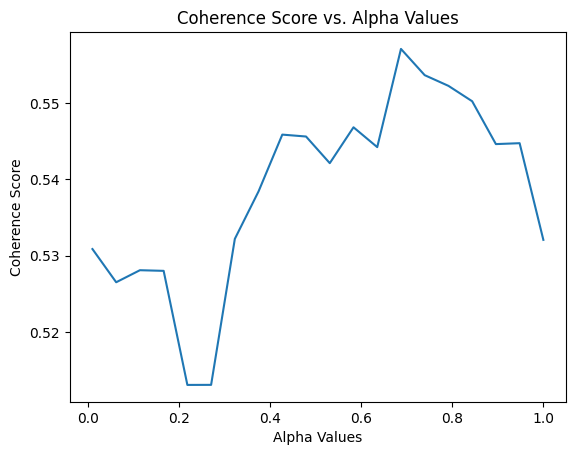

In [12]:
# Calculate coherence scores for each alpha value
coherence_scores, lda_models = calculate_coherence_score_for_alpha_values(data_stemmed_list, alpha_values, num_topics=20, iterations=1000)

# Plot coherence scores against alpha values
plot_coherence_vs_alpha(alpha_values, coherence_scores)

In [13]:
best_index = coherence_scores.index(max(coherence_scores))
best_lda_model = lda_models[best_index]

# Print the topics for the best LDA model
for topic_id, topic_words in best_lda_model.print_topics():
    print(f"Topic ID: {topic_id}, Words: {topic_words}")


Topic ID: 0, Words: 0.024*"গ্রেফতার" + 0.023*"পুলিশ" + 0.021*"অভিযান" + 0.017*"গ্রাম" + 0.016*"উদ্ধ" + 0.014*"উপজেল" + 0.013*"অভিযোগ" + 0.011*"ব্যবসায়ী" + 0.010*"বিরুদ্ধ" + 0.009*"এলাক"
Topic ID: 1, Words: 0.017*"বিচারপতি" + 0.017*"হাইকোর্ট" + 0.013*"আইনজীবী" + 0.012*"কর" + 0.012*"আবেদন" + 0.012*"পুলিশ" + 0.011*"কর্মকর্তা" + 0.010*"মন্ত্রণালয়ের" + 0.009*"ওবায়দুল" + 0.008*"জেনার"
Topic ID: 2, Words: 0.037*"পরিবার" + 0.029*"আক্রান্ত" + 0.024*"স্বাস্থ্য" + 0.023*"ত্রিপুরা" + 0.019*"হাসপাতাল" + 0.014*"ইউনিয়ন" + 0.014*"মৃত্যু" + 0.013*"বান্দরবান" + 0.013*"দুর্গম" + 0.012*"কর্মকর্তা"
Topic ID: 3, Words: 0.029*"সম্পাদক" + 0.022*"সাধারণ" + 0.019*"সভাপতি" + 0.017*"পাপিয়া" + 0.015*"ছাত্রলীগ" + 0.013*"আওয়ামী" + 0.011*"সম্মেলন" + 0.011*"বর্তমান" + 0.010*"নরসিংদী" + 0.010*"কেন্দ্রীয়"
Topic ID: 4, Words: 0.025*"আন্দোলন" + 0.023*"ছাত্রলীগ" + 0.021*"শিক্ষার্থী" + 0.018*"প্রধানমন্ত্রী" + 0.018*"দাবি" + 0.016*"সাধারণ" + 0.016*"বিশ্ববিদ্যালয়ের" + 0.015*"আন্দোলনকারী" + 0.015*"বিক্ষোভ" + 0.013*"বিশ্ববিদ্যা